In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Looking at the data

Training set

In [149]:
train_data = pd.read_csv("../data/raw/train_u6lujuX_CVtuZ9i.csv")

train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Testing set

In [150]:
test_data = pd.read_csv("../data/raw/test_Y3wMUE5_7gLdaTN.csv")

test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Looking at both set's size

In [133]:
print("Training set size: ", train_data.shape)
print("Testing set size: ", test_data.shape)

Training set size:  (614, 13)
Testing set size:  (367, 12)


### Explore the training set more so we can preprocess it

In [13]:
train_data.info()
print("\nNumber of null value in data: \n", train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Number of null value in data: 
 Loan_ID               0
Gender               13
Married               3
Depende

In [10]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### What we can draw from the summary and information

1. ApplicantIncome, and CoapplicantIcome has high standard deviation which indicate high variability in the datasets. This call for data normalization to ensure less spread.

2. Applicants income ranges from as low as 150 to as high as 81000, which could indiciate potential outliers, since 75% of applicants has an income of lower than 5795.

3. Around 25% of co-applicant has no income, which indicate that these loan were applied without co-applicant.

4. The average loan requested is 146.41 but the maximum amount of loan requested is 700 comapred to the 75th percentile (168) which could indicate outliers.

5. Most loan are 360, but there are some as low as 12 which could indicate short-term loans

6. The average credit history is 0.84 which indicate most applicant has good credit history. However, most applicant are missing their credit history.

So columns with null value includes: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History. According to the paper, the missing value are removed.

Loan_ID column is not needed, so we will drop it from both the training set and testing set

In [151]:
train_data.drop("Loan_ID", axis=1, inplace=True)
test_data.drop("Loan_ID", axis=1, inplace=True)

train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Removing missing value

Test set also contain missing value, which we will drop

In [55]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [152]:
train_data = train_data.dropna()
test_data = test_data.dropna()

print("Train set after removing missing value: ", train_data.shape)
print("Test set after removing missing value: ", test_data.shape)

Train set after removing missing value:  (480, 12)
Test set after removing missing value:  (289, 11)


### Removing duplicate value

In [84]:
train_duplicates = train_data.duplicated()
test_duplicates = test_data.duplicated()

print("Duplicated row in train set: ", train_duplicates.sum())
print("Duplicated row in test set: ", test_duplicates.sum())

Duplicated row in train set:  0
Duplicated row in test set:  1


Check duplicated value in the test set incase similar applicants

In [58]:
# Return all rows that are duplicates (including the first occurrence)
duplicate_rows_inclusive = test_data[test_data.duplicated(keep=False)]
print(duplicate_rows_inclusive)


    Gender Married Dependents Education Self_Employed  ApplicantIncome  \
38    Male      No          0  Graduate           Yes             5833   
195   Male      No          0  Graduate           Yes             5833   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
38                   0       116.0             360.0             1.0   
195                  0       116.0             360.0             1.0   

    Property_Area  
38          Urban  
195         Urban  


In [153]:
# Drop duplicate rows
test_data = test_data.drop_duplicates()

### Applying log transformation to normalize data and reduce skewness in data

In [47]:
train_data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [48]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,288.000000,288.000000,288.000000,288.000000,288.000000
mean,4633.201389,1533.569444,136.864583,342.611111,0.840278
std,4798.502017,2380.022814,59.790858,65.761803,0.366986
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2873.250000,0.000000,102.000000,360.000000,1.000000
50%,3831.000000,894.500000,126.000000,360.000000,1.000000
75%,5000.000000,2400.000000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,460.000000,480.000000,1.000000


Based on the information, ApplicantIncome, CoapplicantIncome, and LoanAmount are skew and require normalization

In [154]:
# Copy for comparison
train_data_old = train_data.copy()

In [155]:
train_data["ApplicantIncome"] = np.log1p(train_data["ApplicantIncome"])
train_data["CoapplicantIncome"] = np.log1p(train_data["CoapplicantIncome"])
train_data["LoanAmount"] = np.log1p(train_data["LoanAmount"])


test_data["ApplicantIncome"] = np.log1p(test_data["ApplicantIncome"])
test_data["CoapplicantIncome"] = np.log1p(test_data["CoapplicantIncome"])
test_data["LoanAmount"] = np.log1p(test_data["LoanAmount"])

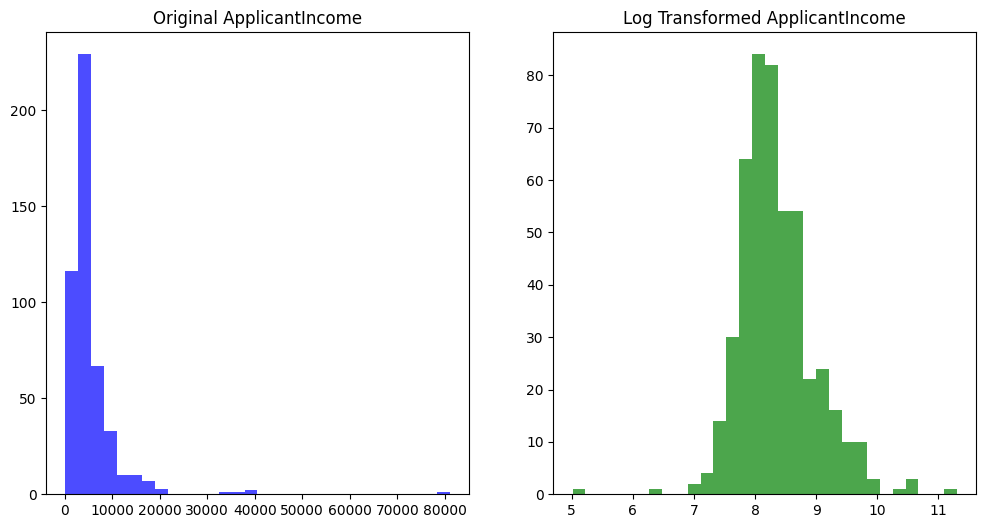

In [156]:
# Plot histograms before and after transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original data
ax[0].hist(train_data_old['ApplicantIncome'], bins=30, color='blue', alpha=0.7)
ax[0].set_title('Original ApplicantIncome')

# After log transformation
ax[1].hist(train_data['ApplicantIncome'], bins=30, color='green', alpha=0.7)
ax[1].set_title('Log Transformed ApplicantIncome')

plt.show()

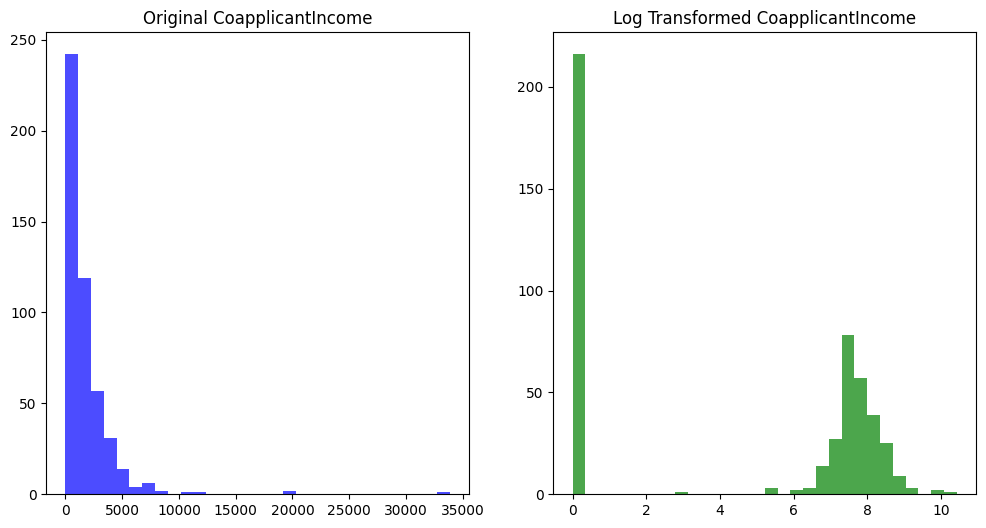

In [157]:
# Plot histograms before and after transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original data
ax[0].hist(train_data_old['CoapplicantIncome'], bins=30, color='blue', alpha=0.7)
ax[0].set_title('Original CoapplicantIncome')

# After log transformation
ax[1].hist(train_data['CoapplicantIncome'], bins=30, color='green', alpha=0.7)
ax[1].set_title('Log Transformed CoapplicantIncome')

plt.show()

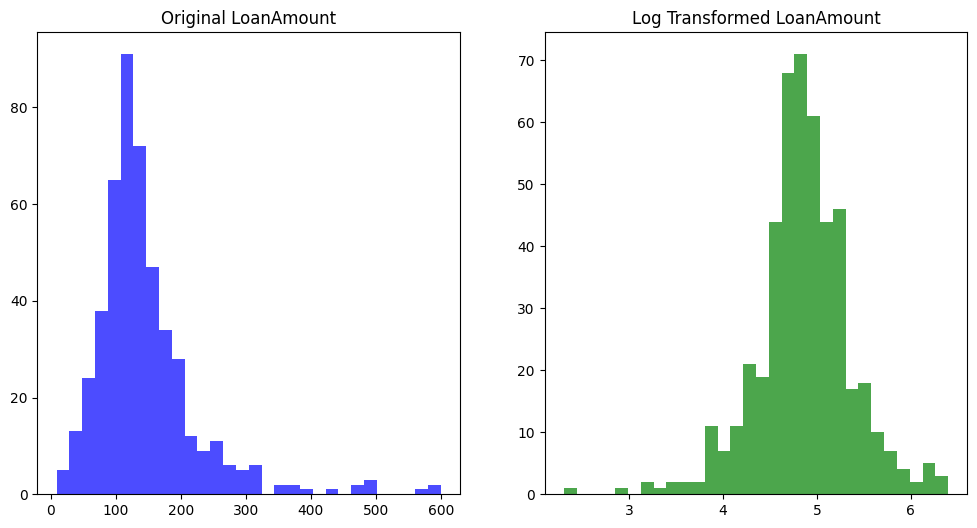

In [142]:
# Plot histograms before and after transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original data
ax[0].hist(train_data_old['LoanAmount'], bins=30, color='blue', alpha=0.7)
ax[0].set_title('Original LoanAmount')

# After log transformation
ax[1].hist(train_data['LoanAmount'], bins=30, color='green', alpha=0.7)
ax[1].set_title('Log Transformed LoanAmount')

plt.show()

After normalization, all data are centered around 0-11 which greatly reduced the variability in dataset.

### Data Encoding

In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    float64
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(5), object(7)
memory usage: 48.8+ KB


In [102]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             288 non-null    object 
 1   Married            288 non-null    object 
 2   Dependents         288 non-null    object 
 3   Education          288 non-null    object 
 4   Self_Employed      288 non-null    object 
 5   ApplicantIncome    288 non-null    float64
 6   CoapplicantIncome  288 non-null    float64
 7   LoanAmount         288 non-null    float64
 8   Loan_Amount_Term   288 non-null    float64
 9   Credit_History     288 non-null    float64
 10  Property_Area      288 non-null    object 
dtypes: float64(5), object(6)
memory usage: 27.0+ KB


In [158]:
train_data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [159]:
print(train_data["Gender"].unique())
print(train_data["Married"].unique())
print(train_data["Dependents"].unique())
print(train_data["Education"].unique())
print(train_data["Self_Employed"].unique())
print(train_data["Property_Area"].unique())
print(train_data["Loan_Status"].unique())
print(train_data["Loan_Amount_Term"].unique())


['Male' 'Female']
['Yes' 'No']
['1' '0' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Urban' 'Semiurban']
['N' 'Y']
[360. 120. 180.  60. 300. 480. 240.  36.  84.]


Data encoding involves turning any object data into numerical value through mapping

Based on the research paper, Integer-encoding approach is used to encode all categorical value. For 𝑒𝑖 ,
it is a vector of the standard base, where 𝑒𝑖 denotes the vector with
the 𝑖𝑡ℎ coordinate.

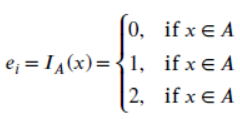

In [160]:
to_numeric = {'Male': 1, 'Female': 0,
'Yes': 1, 'No': 0,
'Graduate': 1, 'Not Graduate': 0,
'Urban': 2, 'Semiurban': 1,'Rural': 0,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
train_data = train_data.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
test_data = test_data.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Dependents_ = pd.to_numeric(train_data.Dependents)
Dependents__ = pd.to_numeric(test_data.Dependents)

# dropping the previous Dependents column
train_data.drop(['Dependents'], axis = 1, inplace = True)
test_data.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
train_data = pd.concat([train_data, Dependents_], axis = 1)
test_data = pd.concat([test_data, Dependents__], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {train_data.shape}\n\ntesting set (row, col): {test_data.shape}\n")
print(train_data.info(), "\n\n", test_data.info())

training set (row, col): (480, 12)

testing set (row, col): (288, 11)

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Education          480 non-null    int64  
 3   Self_Employed      480 non-null    int64  
 4   ApplicantIncome    480 non-null    float64
 5   CoapplicantIncome  480 non-null    float64
 6   LoanAmount         480 non-null    float64
 7   Loan_Amount_Term   480 non-null    float64
 8   Credit_History     480 non-null    float64
 9   Property_Area      480 non-null    int64  
 10  Loan_Status        480 non-null    int64  
 11  Dependents         480 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 48.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 0 to 366
Data columns (total 11 columns):
 #   C

C:\Users\Angkor Computer\AppData\Local\Temp\ipykernel_1824\2314564344.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_data = train_data.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
C:\Users\Angkor Computer\AppData\Local\Temp\ipykernel_1824\2314564344.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_data = test_data.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)


In [161]:
print(train_data["Gender"].unique())
print(train_data["Married"].unique())
print(train_data["Dependents"].unique())
print(train_data["Education"].unique())
print(train_data["Self_Employed"].unique())
print(train_data["Property_Area"].unique())
print(train_data["Loan_Status"].unique())

[1 0]
[1 0]
[1 0 2 3]
[1 0]
[0 1]
[0 2 1]
[0 1]


Now that all the categorical columns are encoded, we need to rescale it to between 0-1 based on the research paper

In [162]:
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
data_scaled = scaler.fit_transform(train_data)

data_scaled = pd.DataFrame(data_scaled, columns=train_data.columns)

data_scaled.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,1.0,1.0,1.0,0.0,0.543052,0.701790,0.624322,0.72973,1.0,0.0,0.0,0.333333
1,1.0,1.0,1.0,1.0,0.475649,0.000000,0.464381,0.72973,1.0,1.0,1.0,0.000000
2,1.0,1.0,0.0,0.0,0.451844,0.744629,0.608691,0.72973,1.0,1.0,1.0,0.000000
3,1.0,0.0,1.0,0.0,0.585909,0.000000,0.647763,0.72973,1.0,1.0,1.0,0.000000
4,1.0,1.0,1.0,1.0,0.569648,0.799871,0.802831,0.72973,1.0,1.0,1.0,0.666667


In [166]:
data_scaled.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.797917,0.137500,0.530947,0.406887,0.623725,0.689302,0.854167,0.511458,0.691667,0.259028
std,0.383892,0.478118,0.401973,0.344734,0.098915,0.371859,0.123196,0.146875,0.353307,0.388205,0.462287,0.340272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.470188,0.000000,0.564582,0.729730,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.515700,0.670205,0.624322,0.729730,1.000000,0.500000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.581946,0.740274,0.693133,0.729730,1.000000,1.000000,1.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the proportion of approved loan to rejected loan

In [167]:
print("Approved loan: ", len(data_scaled[data_scaled["Loan_Status"] == 1.]))
print("Rejected loan: ", len(data_scaled[data_scaled["Loan_Status"] == 0.]))

Approved loan:  332
Rejected loan:  148


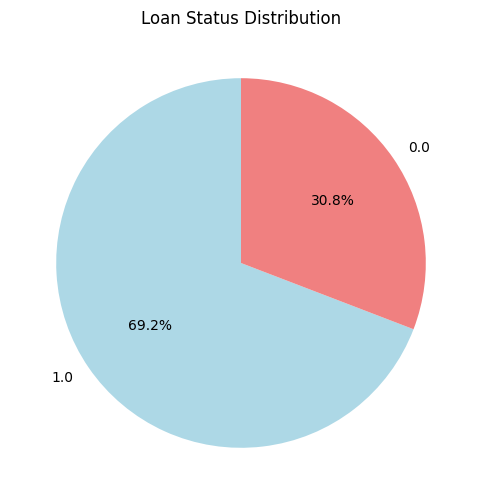

In [168]:
# Count Loan_Status values
loan_status_counts = data_scaled['Loan_Status'].value_counts()

# Extract data for the pie chart
labels = loan_status_counts.index  # Categories (Y, N)
sizes = loan_status_counts.values  # Count of each category

# Plot the pie chart
plt.figure(figsize=(6, 6))  # Adjust size of the figure
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Loan Status Distribution')
plt.show()

The dataset is heavily imabalance where most of the data is approved loan. According to the paper, the author uses 2 data augmentation technique, SMOTE, and another method which include training a simple machine learning model using the available data. After that, they utilized user-selected data, which closely resemble the available data, to evaluate the model and predict the corresponding class labels.

However, since the author failed to mention what machine learning model they used to trained on the available data and how many user-selected data they used, we will only be using SMOTE to augment the data after splitting the data.

### Split data for train and test

In [172]:
# Split data into features (X) and target (y)
X = data_scaled.drop('Loan_Status', axis=1)  # Features
y = data_scaled['Loan_Status']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [175]:
# Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='minority', random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [180]:
print("Train set Approved loan: ", (y_train == 1).sum())
print("Train set Rejected loan: ", (y_train == 0).sum())
print("Test set Approved loan: ", (y_test == 1).sum())
print("Test set Rejected loan: ", (y_test == 0).sum())

Train set Approved loan:  254
Train set Rejected loan:  254
Test set Approved loan:  78
Test set Rejected loan:  42


In [184]:
print("Train set: ", len(y_train))
print("Test set: ", len(y_test))

Train set:  508
Test set:  120
